<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
!pip install ucimlrepo

In [72]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wholesale_customers = fetch_ucirepo(id=292) 
  
# data (as pandas dataframes) 
X = wholesale_customers.data.features 
y = wholesale_customers.data.targets 
  
# metadata 
print(wholesale_customers.metadata) 
  
# variable information 
print(wholesale_customers.variables) 

{'uci_id': 292, 'name': 'Wholesale customers', 'repository_url': 'https://archive.ics.uci.edu/dataset/292/wholesale+customers', 'data_url': 'https://archive.ics.uci.edu/static/public/292/data.csv', 'abstract': 'The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 440, 'num_features': 7, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Region'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Mon Feb 05 2024', 'dataset_doi': '10.24432/C5030X', 'creators': ['Margarida Cardoso'], 'intro_paper': None, 'additional_info': {'summary': None, 'purpose': None, 'funded_by': None, 'instances_represent': None, 'recommended_data_splits': None, 'sensitive_data': None, 'preprocessing_description':

#### Explore the dataset with mathematical and visualization techniques. What do you find?

* What does each column mean?

In [5]:
X

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,1,29703,12051,16027,13135,182,2204
436,1,39228,1431,764,4510,93,2346
437,2,14531,15488,30243,437,14841,1867
438,1,10290,1981,2232,1038,168,2125


In [8]:
X['Channel'].value_counts()

Channel
1    298
2    142
Name: count, dtype: int64

In [9]:
# Channel 1 = Horeca (Hotel/Restaurant/Café)
# Channel 2 = Retail

In [4]:
X.columns

Index(['Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicassen'],
      dtype='object')

* Any categorical data to convert?

No. Only the channel represents categories, but it's already represented as numerical.

* Any missing data to remove?

In [11]:
X.isna().any()

Channel             False
Fresh               False
Milk                False
Grocery             False
Frozen              False
Detergents_Paper    False
Delicassen          False
dtype: bool

* Column collinearity - any high correlations?

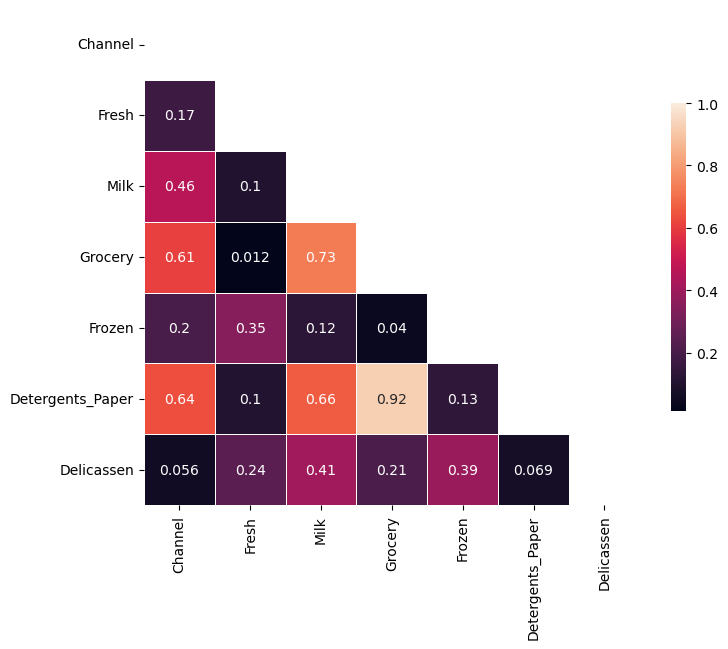

In [12]:
corr=np.abs(X.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

* Descriptive statistics - any outliers to remove?

In [13]:
X.describe()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


* Column-wise data distribution - is the distribution skewed?

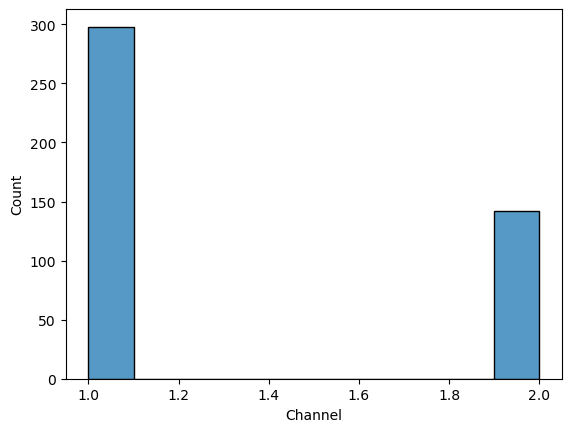

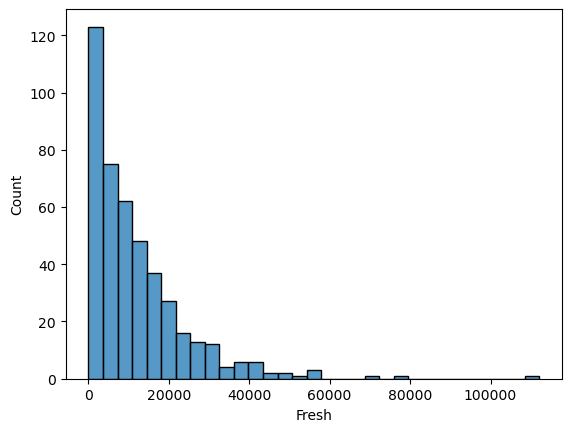

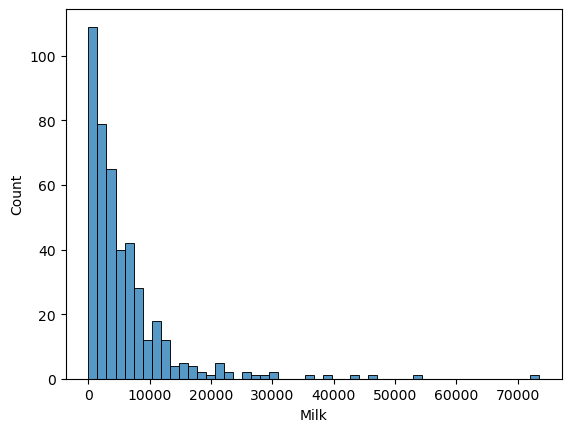

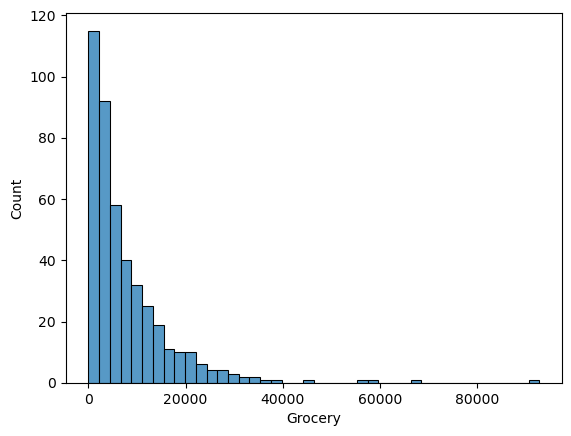

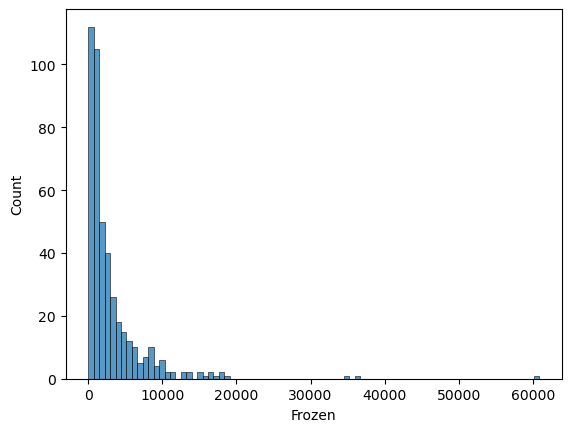

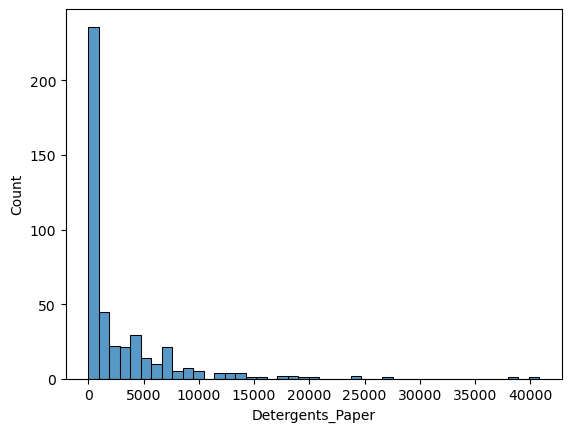

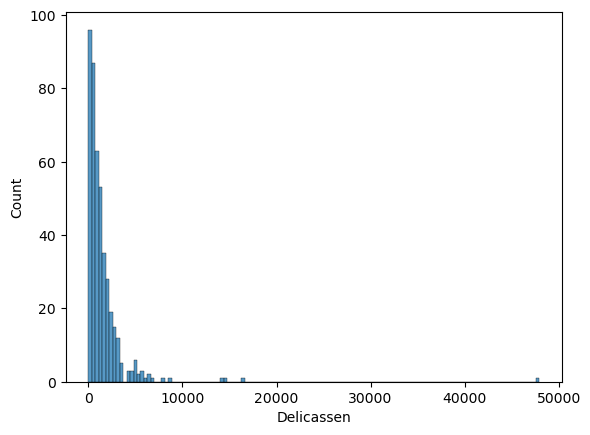

In [22]:
for column in X:
    sns.histplot(data=X[column])
    plt.show()

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [47]:
X[X['Channel']==2].shape

(142, 8)

In [ ]:
# There's 142 retail customers, 20% = 28. We need to find the 28 customers with most money spent.

In [26]:
X['Total_spent'] = X['Fresh'] + X['Milk'] + X['Grocery'] + X['Frozen'] + X['Detergents_Paper'] + X['Delicassen']

In [48]:
spentbytop20pct_retail = X[X['Channel']==2].sort_values(by=['Total_spent'], ascending=False)[:28]['Total_spent'].sum()
spentbytop20pct_retail

2525925

In [52]:
total_spent_allcusts_retail = X[X['Channel']==2]['Total_spent'].sum()
total_spent_allcusts_retail

6619931

In [53]:
total_spent_allcusts_retail * 0.8

5295944.800000001

In [54]:
# This dataset doesn't displays this characteristic.

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [55]:
# No cleaning needed.

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [74]:
scaler.fit(X)

StandardScaler()

In [75]:
X_scaled = scaler.transform(X)

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [76]:
from sklearn.cluster import KMeans

kmeans= KMeans(n_clusters=3)
kmeans.fit(X_scaled)

KMeans(n_clusters=3)

In [77]:
X['labels'] = kmeans.predict(X_scaled)

In [78]:
X

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,12669,9656,7561,214,2674,1338,1
1,2,7057,9810,9568,1762,3293,1776,1
2,2,6353,8808,7684,2405,3516,7844,1
3,1,13265,1196,4221,6404,507,1788,0
4,2,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...,...
435,1,29703,12051,16027,13135,182,2204,0
436,1,39228,1431,764,4510,93,2346,0
437,2,14531,15488,30243,437,14841,1867,1
438,1,10290,1981,2232,1038,168,2125,0


### Looking to the elbow we can choose 2 like the correct number of clusters

In [79]:
kmeans_2 = KMeans(n_clusters=2).fit(X_scaled)

labels = kmeans_2.predict(X_scaled)

clusters = kmeans_2.labels_.tolist()

In [83]:
clusters

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,


In [84]:
X['Label2'] = clusters

Count the values in `labels`.

In [85]:
X['Label2'].value_counts()

Label2
1    305
0    135
Name: count, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [86]:
from sklearn.cluster import DBSCAN 

dbscan = DBSCAN(eps=0.5)

In [89]:
dbscan.fit(X_scaled)

DBSCAN()

In [91]:
dbscan.labels_

array([ 3, -1, -1,  1, -1,  3,  0,  0,  1, -1, -1, -1, -1, -1, -1,  1,  0,
       -1, -1,  1,  3,  1, -1, -1, -1,  0,  1,  1, -1,  2, -1,  1,  1, -1,
        1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  1,
        1, -1,  0,  1,  1, -1, -1,  1,  1,  0, -1, -1, -1,  1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1,  0,  1, -1, -1,  1,  1,  1,  0, -1,  1,  0,
       -1, -1, -1,  1, -1,  1,  1, -1, -1,  0,  1, -1,  1,  1,  1, -1, -1,
        0, -1,  1,  1,  0, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1, -1,  1, -1,  1,  2,  1,  1,  1,  1,  1,  1,
       -1, -1, -1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1, -1,  1,  0,  0,  0,  1,  1, -1, -1, -1, -1,  1,  1,  1,
        0, -1,  1, -1,  1,  0, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1,
       -1, -1,  0, -1,  1,  1, -1,  1,  1, -1,  0,  1,  1, -1, -1, -1,  1,
        1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  0, -1, -1,  1, -1,  1,  1,
       -1,  1, -1,  1,  1

In [92]:
X['labels_DBSCAN'] = dbscan.labels_

Count the values in `labels_DBSCAN`.

In [93]:
X['labels_DBSCAN'].value_counts()

labels_DBSCAN
 1    201
-1    194
 0     32
 3      8
 2      5
Name: count, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [111]:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title(f'{x.name} vs {y.name} ')
    return plt.show();

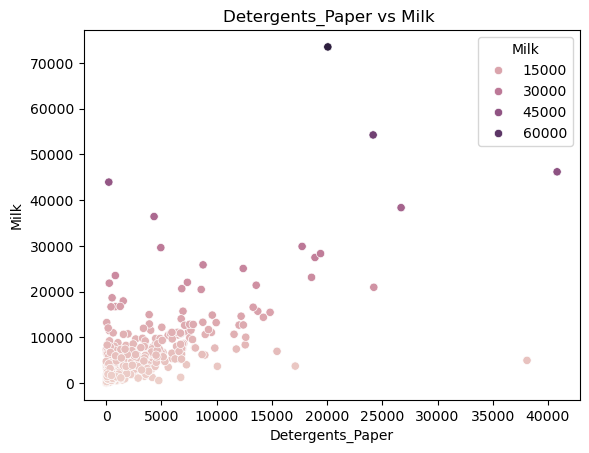

In [112]:
plot(X['Detergents_Paper'], X['Milk'], X['Milk'])

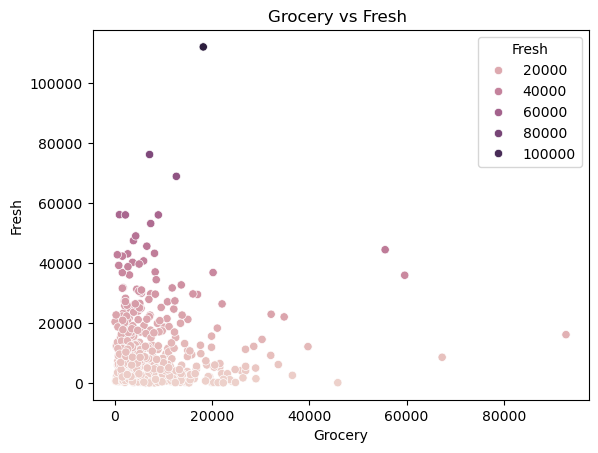

In [113]:
plot(X['Grocery'], X['Fresh'], X['Fresh'])

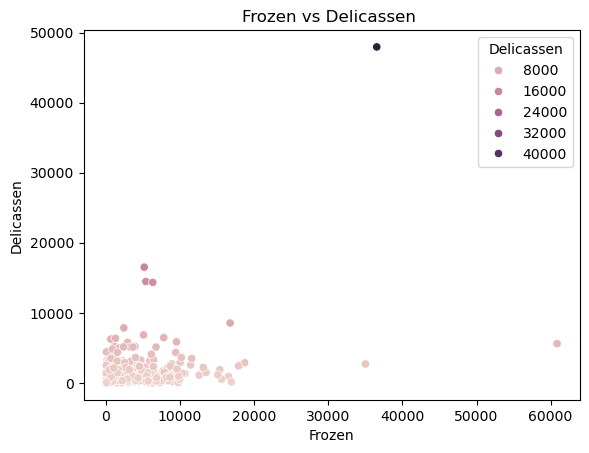

In [114]:
plot(X['Frozen'], X['Delicassen'], X['Delicassen'])

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

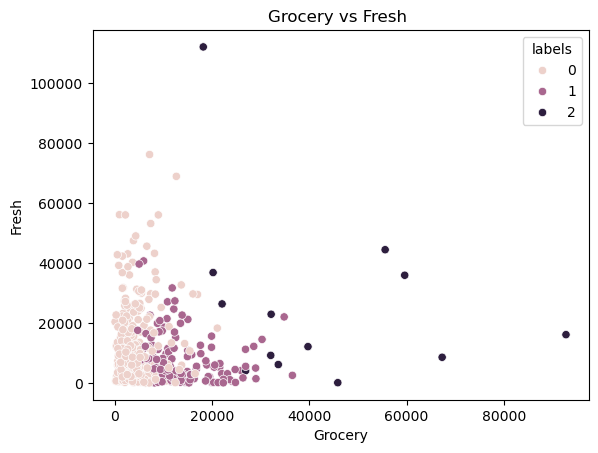

In [120]:
plot(X['Grocery'], X['Fresh'], X['labels'])

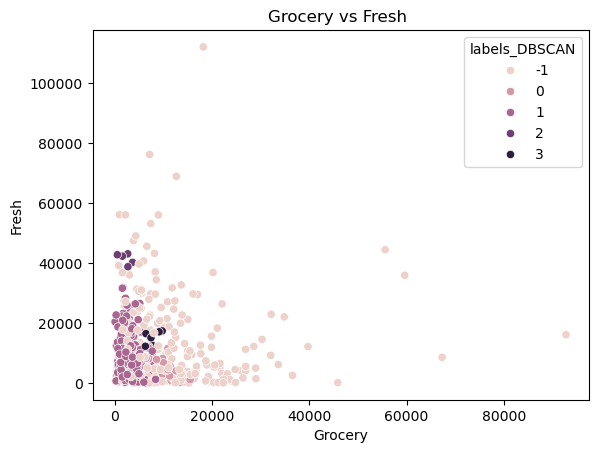

In [121]:
plot(X['Grocery'], X['Fresh'], X['labels_DBSCAN'])

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

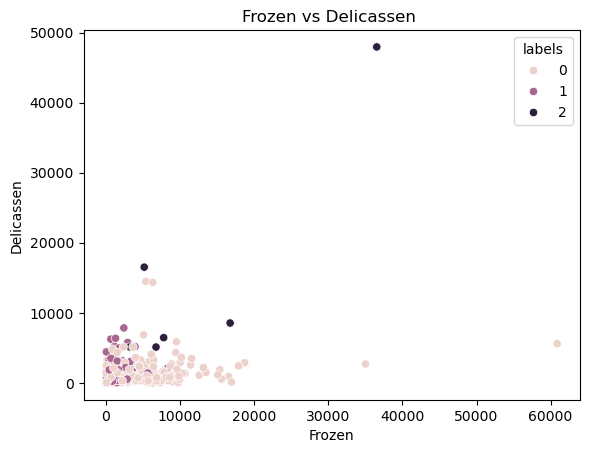

In [123]:
plot(X['Frozen'], X['Delicassen'], X['labels'])

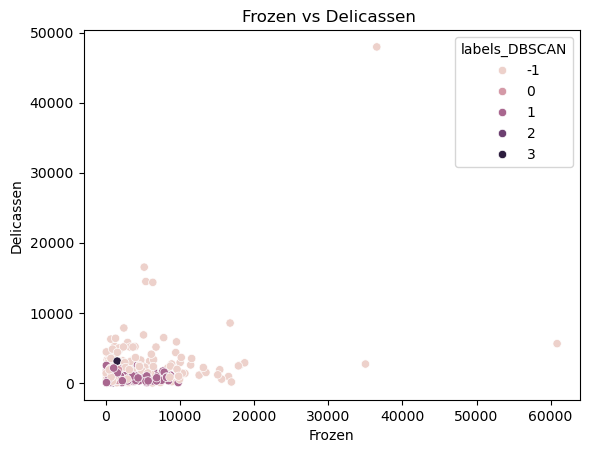

In [122]:
plot(X['Frozen'], X['Delicassen'], X['labels_DBSCAN'])

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [125]:
X.groupby(by=['labels']).mean()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label2,labels_DBSCAN
labels,,,,,,,,,
0,1.003367,13075.898990,3218.737374,3855.696970,3620.400673,776.875421,1242.249158,1.000000,0.404040
1,2.000000,8165.915385,8748.515385,13905.492308,1441.630769,5991.146154,1535.007692,0.053846,-0.507692
2,1.846154,25770.769231,35160.384615,41977.384615,6844.538462,19867.384615,7880.307692,0.076923,-1.000000


In [126]:
X.groupby(by=['labels_DBSCAN']).mean()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,Label2
labels_DBSCAN,,,,,,,,,
-1,1.525773,14873.912371,9560.984536,13221.046392,4408.881443,5068.613402,2398.324742,0.597938,0.510309
0,2.000000,4838.500000,6644.593750,10277.156250,784.593750,4776.093750,1004.843750,1.000000,0.000000
1,1.000000,9525.940299,2103.004975,2676.333333,2274.363184,542.094527,766.039801,0.000000,1.000000
2,1.000000,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000,0.000000,1.000000
3,2.000000,14726.625000,6636.125000,7003.625000,961.375000,2583.625000,1951.875000,1.000000,0.000000


# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [41]:
# Your code here:

**Your comment here**

- 

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

**Your comment here**

- 